<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Scratch_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
Theory
PCA does not directly select some important features and drops irrelevant ones, 
but rather it constructs new features from the given ones that capture the most 
variation in the data.
"""

In [1]:
# Extract Data

!wget https://raw.githubusercontent.com/hammadshaikhha/Math-of-Machine-Learning-Course-by-Siraj/master/Principal%20Component%20Analysis/diabetes.csv

--2019-06-20 05:28:43--  https://raw.githubusercontent.com/hammadshaikhha/Math-of-Machine-Learning-Course-by-Siraj/master/Principal%20Component%20Analysis/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.01s   

2019-06-20 05:28:44 (2.06 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [0]:
# For matrix computation
import numpy as np
# For data manipulation 
import pandas as pd
# For 2D plotting 
from matplotlib import pyplot as plt
# For 3D plotting 
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

In [0]:
dataset = pd.read_csv("/content/diabetes.csv")

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
"""
Since PCA relies on maximizing the variance of the projected data onto a linear 
subspace, if features in the data are measured in several different scales then 
this can result in PCA assigning inappropriately large weights to certain features 
with highly varying scales. Hence before applying PCA it is recommended to standardize 
the data on the same scale
"""

In [0]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [0]:
X_std = StandardScaler().fit_transform(X)

In [24]:
X_std.shape

(768, 8)

In [9]:
#Covariate Matrix for X

cov_matrix = np.cov(X_std, rowvar=False)
cov_matrix

array([[ 1.00130378,  0.12962746,  0.14146618, -0.08177826, -0.07363049,
         0.01770615, -0.03356638,  0.54505093],
       [ 0.12962746,  1.00130378,  0.15278853,  0.05740263,  0.33178913,
         0.2213593 ,  0.13751636,  0.26385788],
       [ 0.14146618,  0.15278853,  1.00130378,  0.2076409 ,  0.08904933,
         0.2821727 ,  0.04131875,  0.23984024],
       [-0.08177826,  0.05740263,  0.2076409 ,  1.00130378,  0.43735204,
         0.39308503,  0.18416737, -0.11411885],
       [-0.07363049,  0.33178913,  0.08904933,  0.43735204,  1.00130378,
         0.19811702,  0.18531222, -0.04221793],
       [ 0.01770615,  0.2213593 ,  0.2821727 ,  0.39308503,  0.19811702,
         1.00130378,  0.14083033,  0.03628912],
       [-0.03356638,  0.13751636,  0.04131875,  0.18416737,  0.18531222,
         0.14083033,  1.00130378,  0.03360507],
       [ 0.54505093,  0.26385788,  0.23984024, -0.11411885, -0.04221793,
         0.03628912,  0.03360507,  1.00130378]])

In [0]:
# Get Eigen Vector and Eigen Values of Cov Matrix

eigenvalues, eigenvectors =  np.linalg.eig(cov_matrix)

In [29]:
cov_matrix.shape, eigenvalues.shape, eigenvectors.shape

((8, 8), (8,), (8, 8))

In [12]:
eigenvalues

array([2.09711056, 1.73346726, 0.42036353, 0.40498938, 0.68351839,
       0.76333832, 0.87667054, 1.03097228])

In [0]:
# Sort Eigen Values
eig_pairs = [ (eigenvalues[i], eigenvectors[:, i]) for i in range(eigenvalues.shape[0])]

eig_pairs.sort()
eig_pairs.reverse()

In [17]:
eig_pairs

[(2.0971105579945237,
  array([0.1284321 , 0.39308257, 0.36000261, 0.43982428, 0.43502617,
         0.45194134, 0.27061144, 0.19802707])),
 (1.733467259447126,
  array([ 0.59378583,  0.17402908,  0.18389207, -0.33196534, -0.25078106,
         -0.1009598 , -0.122069  ,  0.62058853])),
 (1.0309722810083823,
  array([ 0.01308692, -0.46792282,  0.53549442,  0.2376738 , -0.33670893,
          0.36186463, -0.43318905, -0.07524755])),
 (0.8766705419094794,
  array([-0.08069115,  0.40432871, -0.05598649, -0.03797608,  0.34994376,
         -0.05364595, -0.8336801 , -0.0712006 ])),
 (0.7633383156496714,
  array([ 0.47560573, -0.46632804, -0.32795306,  0.48786206,  0.34693481,
         -0.25320376, -0.11981049,  0.10928996])),
 (0.6835183858447277,
  array([-0.19359817, -0.09416176,  0.6341159 , -0.00958944,  0.27065061,
         -0.68537218,  0.08578409,  0.03335717])),
 (0.4203635280495672,
  array([ 0.58879003,  0.06015291,  0.19211793, -0.28221253,  0.13200992,
          0.03536644,  0.086091

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]


In [19]:
# Choosing Number of Components

var_comp_sum = np.cumsum(eigvalues_sort) / sum(eigvalues_sort)
var_comp_sum

array([0.26179749, 0.47819876, 0.60690249, 0.71634362, 0.81163667,
       0.89696522, 0.94944224, 1.        ])

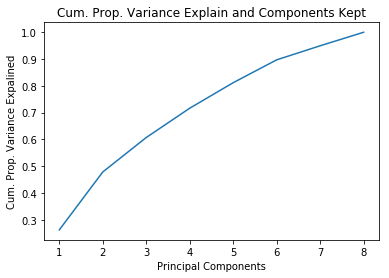

In [20]:
num_comp = range(1,len(eigvalues_sort)+1)

# Chart title
plt.title('Cum. Prop. Variance Explain and Components Kept')

# x-label
plt.xlabel('Principal Components')

# y-label
plt.ylabel('Cum. Prop. Variance Expalined')

# Scatter plot of cumulative variance explained and principal components kept
plt.plot(num_comp, var_comp_sum)

# Show scattor plot
plt.show()

In [22]:
# Get First 2 Eigen Vectors
p_reduce = np.array(eigvectors_sort[0:2]).T
p_reduce

array([[ 0.1284321 ,  0.59378583],
       [ 0.39308257,  0.17402908],
       [ 0.36000261,  0.18389207],
       [ 0.43982428, -0.33196534],
       [ 0.43502617, -0.25078106],
       [ 0.45194134, -0.1009598 ],
       [ 0.27061144, -0.122069  ],
       [ 0.19802707,  0.62058853]])

In [25]:
X_2d_pca = np.dot(X_std, p_reduce)
X_std.shape, X_2d_pca.shape

((768, 8), (768, 2))

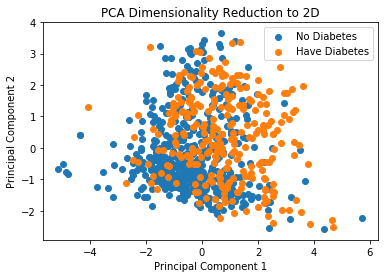

In [27]:
# Visualize
negative = plt.scatter(X_2d_pca[:, 0][y == 0], X_2d_pca[:, 1][y == 0])
positive = plt.scatter(X_2d_pca[:, 0][y == 1], X_2d_pca[:, 1][y == 1])

plt.title('PCA Dimensionality Reduction to 2D')

# y-label
plt.ylabel('Principal Component 2')

# x-label
plt.xlabel('Principal Component 1')

# legend
plt.legend([negative,positive],["No Diabetes", "Have Diabetes"])

plt.show()

In [0]:
loading = eigvectors_sort * np.sqrt(eigvalues_sort)

In [32]:
loading

array([[ 0.18598772,  0.51753724,  0.36553515,  0.41181049,  0.38007903,
         0.37364327,  0.17545214,  0.12602201],
       [ 0.85988523,  0.22912878,  0.18671813, -0.31082143, -0.21910549,
        -0.08346868, -0.07914399,  0.39493495],
       [ 0.0189517 , -0.61607281,  0.54372393,  0.22253561, -0.29418002,
         0.2991722 , -0.28086006, -0.04788662],
       [-0.11685212,  0.53234404, -0.05684689, -0.03555727,  0.30574319,
        -0.04435188, -0.54052023, -0.04531119],
       [ 0.68874386, -0.61397311, -0.33299306,  0.4567886 ,  0.30311429,
        -0.20933664, -0.07767967,  0.06955079],
       [-0.28035732, -0.1239745 ,  0.64386102, -0.00897866,  0.23646537,
        -0.56663262,  0.0556185 ,  0.02122809],
       [ 0.85265062,  0.07919805,  0.19507041, -0.26423753,  0.11533606,
         0.02923926,  0.05581753, -0.45316244],
       [ 0.17065029,  0.59294315, -0.01146913,  0.53021541, -0.4793263 ,
        -0.28235029, -0.00535459, -0.13469909]])

In [0]:
"""
Loadings interpret principal components or factors; Because they are the 
linear combination weights (coefficients) whereby unit-scaled components or 
factors define or "load" a variable.

Eigenvector is just a coefficient of orthogonal transformation or projection, 
it is devoid of "load" within its value. "Load" is (information of the amount of)
variance, magnitude. PCs are extracted to explain variance of the variables. 
Eigenvalues are the variances of (= explained by) PCs. When we multiply 
eigenvector by sq.root of the eivenvalue we "load" the bare coefficient 
by the amount of variance. By that virtue we make the coefficient to be the 
measure of association, co-variability.
"""